## Iran Protest
    Objectives 
    - Demonstrating ETL projects within python
    - Visualizing Data for insights within python

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import pyodbc
import sqlalchemy 

In [2]:
#creating connection to sql

server = 'DESKTOP-ENLCPBJ\SQLEXPRESS01'
database = 'Iran_protest'
username = 'DESKTOP-ENLCPBJ\Bamy'
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;UID={username}'

try:
    connection = pyodbc.connect(conn_str)
    print("Connection successful!")
except Exception as e:
    print(f"Connection failed. Error: {str(e)}")

Connection successful!


In [3]:
sql_query = """Select *
from Iran_protest..iran_protest WITH (Nolock)
"""

In [4]:
data = pd.read_sql(sql_query, connection)

C:\Users\Bamy\AppData\Local\Temp\ipykernel_14828\1542644387.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(sql_query, connection)


In [5]:
data

,Date,Death_Toll_of_Protestors,Number_of_Children_Killed,Number_of_Military_Security_Personnel_Killed,Number_of_Individuals_Arrested,Number_of_Detainees_Identified,Number_of_Students_Arrested,Number_of_Protests,Number_of_Cities_Involved,Number_of_Universities_Involved
0,2022-09-17,0,0,0,78,13,0,2,2,0
1,2022-09-18,0,0,0,255,29,1,7,4,2
2,2022-09-19,8,0,0,527,58,5,32,14,7
3,2022-09-20,28,1,1,1040,101,7,76,26,9
4,2022-09-21,74,8,9,1285,145,12,129,43,18
...,...,...,...,...,...,...,...,...,...,...
153,2023-02-17,529,71,70,19763,5203,723,1280,165,144
154,2023-02-18,529,71,70,19763,5205,723,1280,165,144
155,2023-02-19,530,71,70,19763,5206,723,1280,165,144
156,2023-02-20,530,71,70,19763,5208,723,1280,165,144


In [6]:
from datetime import datetime as dt

In [7]:
data.shape

(158, 10)

In [8]:
data.columns

Index(['Date', 'Death_Toll_of_Protestors', 'Number_of_Children_Killed',
       'Number_of_Military_Security_Personnel_Killed',
       'Number_of_Individuals_Arrested', 'Number_of_Detainees_Identified',
       'Number_of_Students_Arrested', 'Number_of_Protests',
       'Number_of_Cities_Involved', 'Number_of_Universities_Involved'],
      dtype='object')

In [9]:
data.isnull().sum()

Date                                            0
Death_Toll_of_Protestors                        0
Number_of_Children_Killed                       0
Number_of_Military_Security_Personnel_Killed    0
Number_of_Individuals_Arrested                  0
Number_of_Detainees_Identified                  0
Number_of_Students_Arrested                     0
Number_of_Protests                              0
Number_of_Cities_Involved                       0
Number_of_Universities_Involved                 0
dtype: int64

## Extracting the months date from the date column

In [10]:
from dateutil import relativedelta

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
# Function to convert date to words
def date_to_words(date):
    return date.strftime("%B %d, %Y")

In [16]:
data["month"] = data["Date"].apply(date_to_words)

In [17]:
data.drop('Date', axis=1, inplace=True)

In [18]:
import re

In [19]:
pattern = r'\b(January|February|March|April|May|June|July|August|September|October|November|December)\b'

In [21]:
data["month"] = data["month"].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

In [22]:
data

,Death_Toll_of_Protestors,Number_of_Children_Killed,Number_of_Military_Security_Personnel_Killed,Number_of_Individuals_Arrested,Number_of_Detainees_Identified,Number_of_Students_Arrested,Number_of_Protests,Number_of_Cities_Involved,Number_of_Universities_Involved,month
0,0,0,0,78,13,0,2,2,0,September
1,0,0,0,255,29,1,7,4,2,September
2,8,0,0,527,58,5,32,14,7,September
3,28,1,1,1040,101,7,76,26,9,September
4,74,8,9,1285,145,12,129,43,18,September
...,...,...,...,...,...,...,...,...,...,...
153,529,71,70,19763,5203,723,1280,165,144,February
154,529,71,70,19763,5205,723,1280,165,144,February
155,530,71,70,19763,5206,723,1280,165,144,February
156,530,71,70,19763,5208,723,1280,165,144,February


## Exporting Data to replace old dataset within Sql Database

In [23]:
# Closing previous connection
connection.close()

In [27]:
from sqlalchemy import create_engine

In [28]:
iran_protest = data

In [29]:
#Define connection
server = 'DESKTOP-ENLCPBJ\SQLEXPRESS01'
database = 'Iran_protest'
username = 'DESKTOP-ENLCPBJ\Bamy'
conn_str = f'mssql+pyodbc://{username}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

In [30]:
# Establish connection using SQLAlchemy
engine = create_engine(conn_str)

In [31]:
# Export transformed data back to the SQL Server using SQLAlchemy connection
try:
    iran_protest.to_sql('iran_protest', con=engine, if_exists='replace', index=False)
    print("Data exported successfully!")
except Exception as e:
    print(f"Error exporting data: {str(e)}")
finally:
    engine.dispose()

Data exported successfully!


## Creating a Simple Dashboard

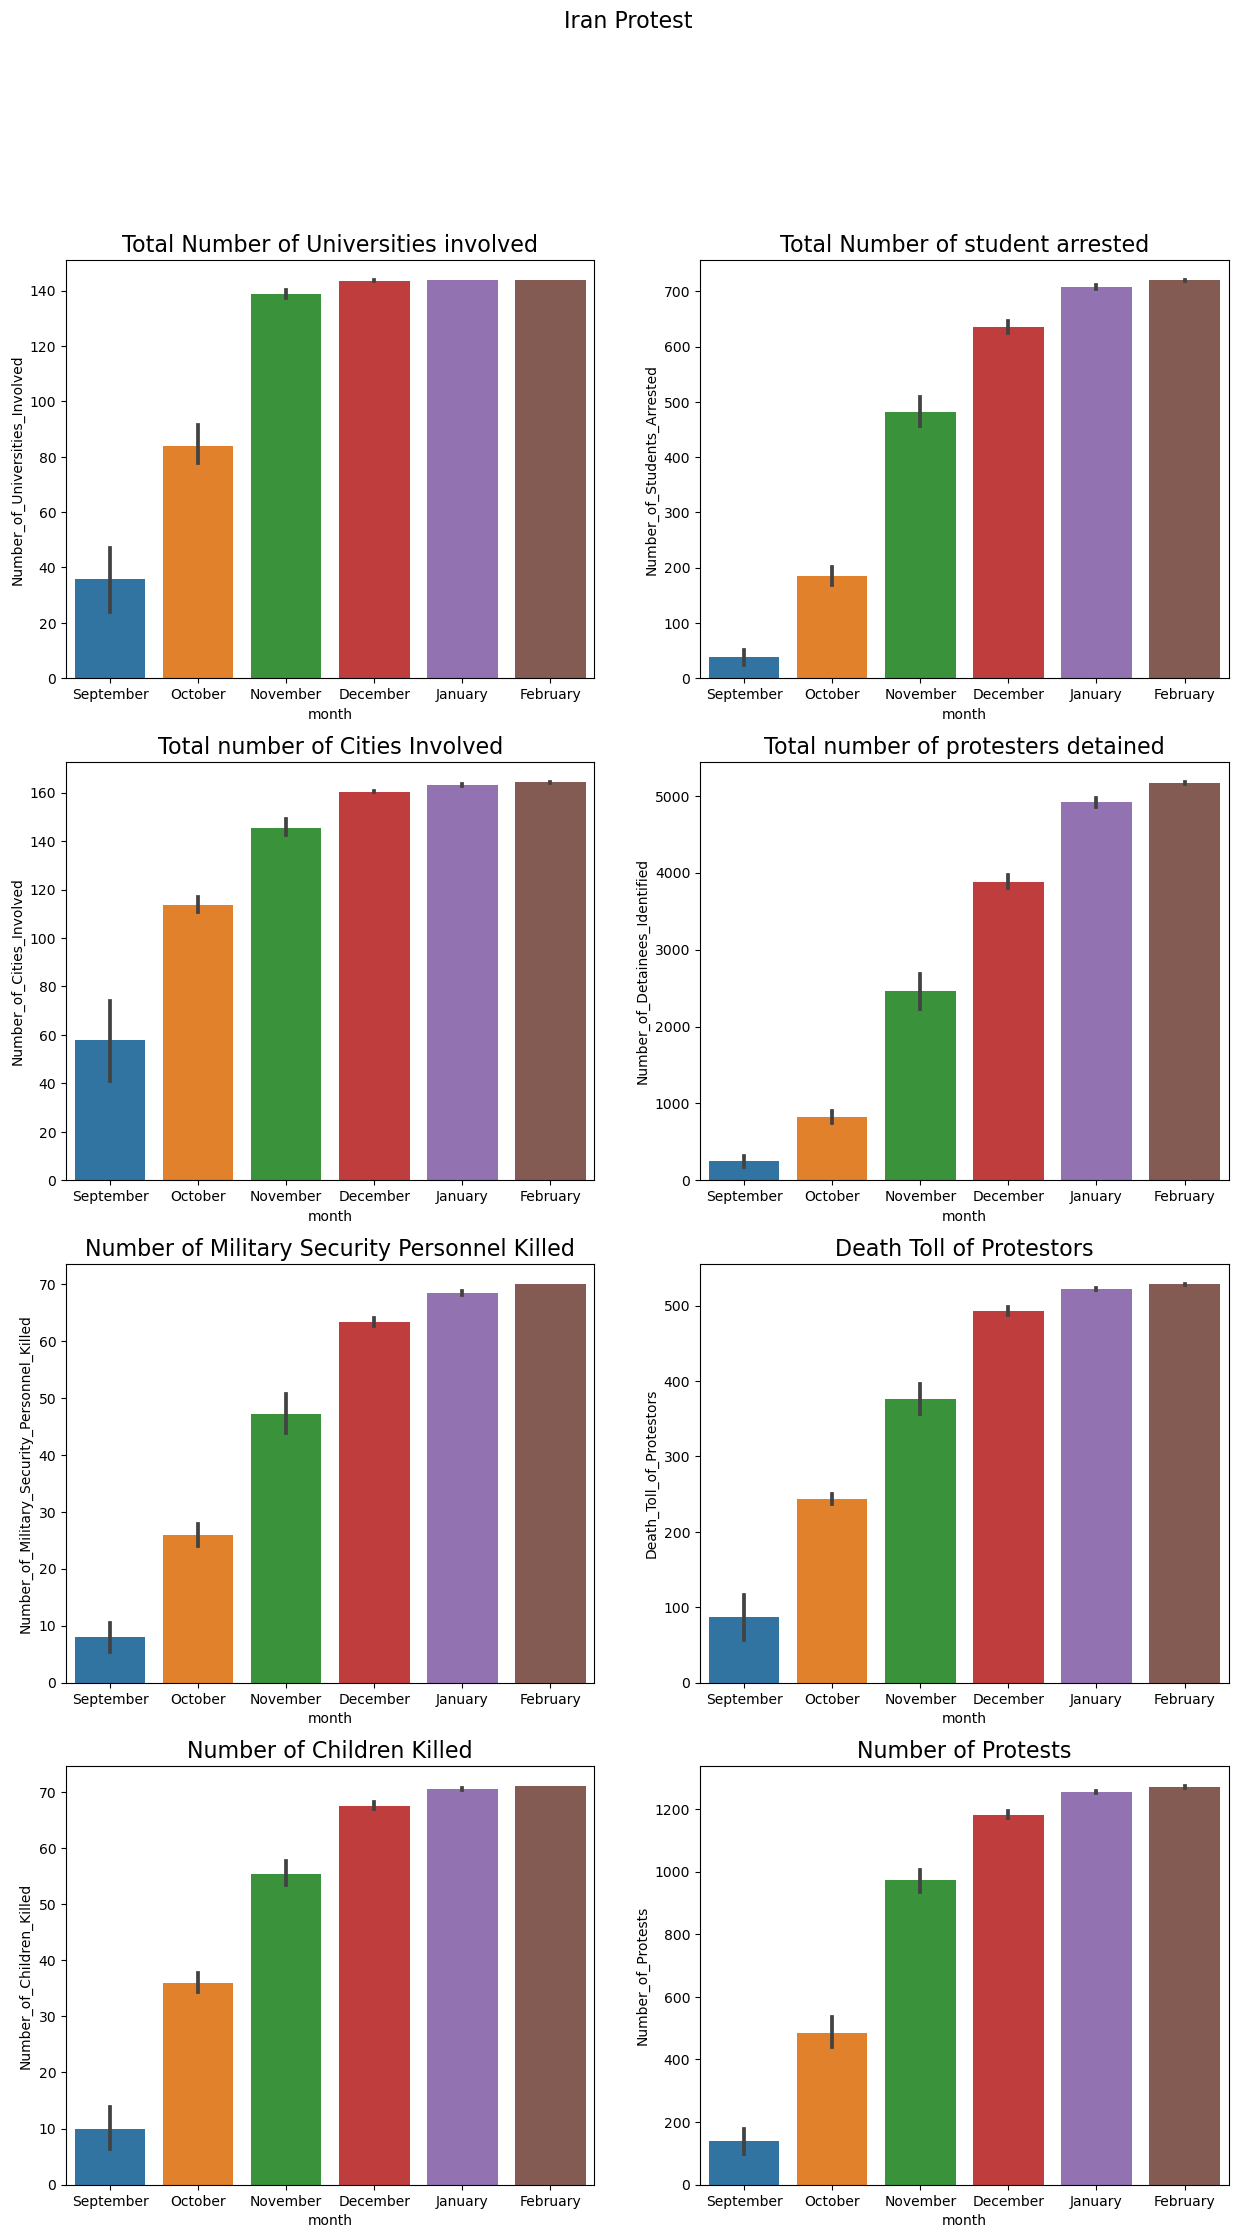

In [100]:
#creating a dashboard
fig, axes = plt.subplots(4,2, figsize=(15, 25))


sns.barplot(x= data['month'], y=data['Number_of_Universities_Involved'], ax=axes[0, 0])
axes[0, 0].set_title('Total Number of Universities involved', fontsize=16)



sns.barplot(x= data['month'], y=data['Number_of_Students_Arrested'], ax=axes[0, 1])
axes[0, 1].set_title('Total Number of student arrested', fontsize=16)

    
sns.barplot(x=data['month'], y=data['Number_of_Cities_Involved'], data=data, ax=axes[1, 0])
axes[1, 0].set_title('Total number of Cities Involved', fontsize=16)


sns.barplot(x=data['month'], y=data['Number_of_Detainees_Identified'], ax=axes[1, 1])
axes[1, 1].set_title('Total number of protesters detained', fontsize=16)


sns.barplot(x=data['month'], y=data['Number_of_Military_Security_Personnel_Killed'], ax=axes[2, 0])
axes[2, 0].set_title('Number of Military Security Personnel Killed', fontsize=16)


sns.barplot(x=data['month'], y=data['Death_Toll_of_Protestors'], ax=axes[2, 1])
axes[2, 1].set_title('Death Toll of Protestors', fontsize=16)


sns.barplot(x=data['month'], y=data['Number_of_Children_Killed'], ax=axes[3, 0])
axes[3, 0].set_title('Number of Children Killed', fontsize=16)

sns.barplot(x=data['month'], y=data['Number_of_Protests'], ax=axes[3, 1])
axes[3, 1].set_title('Number of Protests', fontsize=16)

plt.suptitle('Iran Protest', fontsize=16)

plt.show()

In [82]:
data.columns

Index(['Death_Toll_of_Protestors', 'Number_of_Children_Killed',
       'Number_of_Military_Security_Personnel_Killed',
       'Number_of_Individuals_Arrested', 'Number_of_Detainees_Identified',
       'Number_of_Students_Arrested', 'Number_of_Protests',
       'Number_of_Cities_Involved', 'Number_of_Universities_Involved',
       'month'],
      dtype='object')